In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=1000, centers=3, 
                  n_features=2,
                  random_state=42)

In [5]:
X.shape

(1000, 2)

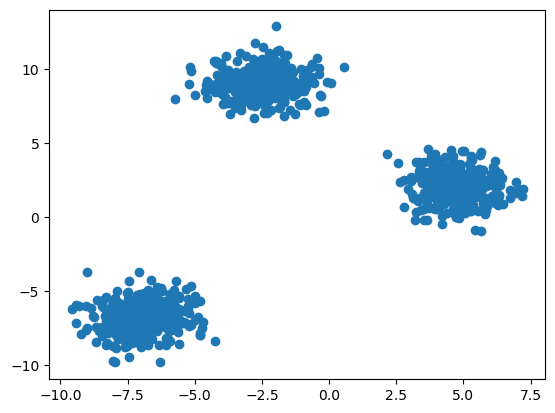

In [12]:
plt.scatter(X[:,0],X[:,1])

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
from sklearn.cluster import KMeans

In [27]:
#manual method
#elbow method to select the k value
wcss=[]
for k in range(1,11):
    k_means=KMeans(n_clusters=k, init='k-means++')
    k_means.fit(X_train)
    wcss.append(k_means.inertia_)

C:\Users\erzub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\erzub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\erzub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\erzub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [29]:
wcss


[46568.38344977143,
 13218.488245374643,
 1402.9560472122444,
 1244.6014204904436,
 1068.3023578806751,
 903.3287757570506,
 835.2174206355023,
 756.3740318547583,
 682.4374435802937,
 599.0494154511437]

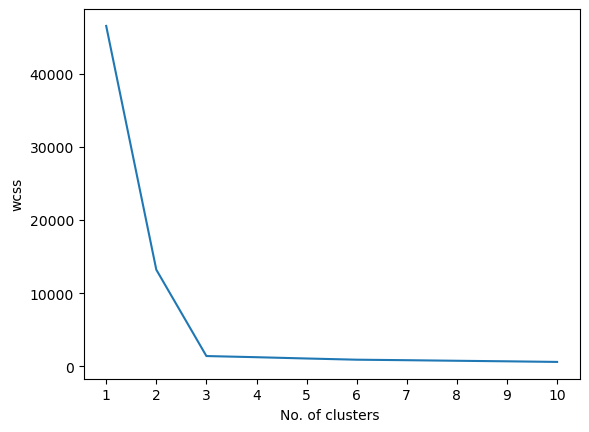

In [31]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No. of clusters ")
plt.ylabel("wcss")
plt.show()

In [33]:
k_means=KMeans(n_clusters=3, init='k-means++')

In [37]:
y_labels=k_means.fit_predict(X_train)

C:\Users\erzub\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [39]:
y_labels

array([1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       2, 2, 0, 0, 2, 0, 1, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2,
       0, 2, 2, 1, 1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2,
       0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 2, 1, 0, 2,
       1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2,
       0, 2, 1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2,
       2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 2, 1,
       2, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 2, 0, 0,
       1, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2,
       2, 2, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0,
       2, 2, 1, 1, 0, 1, 0, 1, 2, 0, 2, 2, 0, 2, 0,

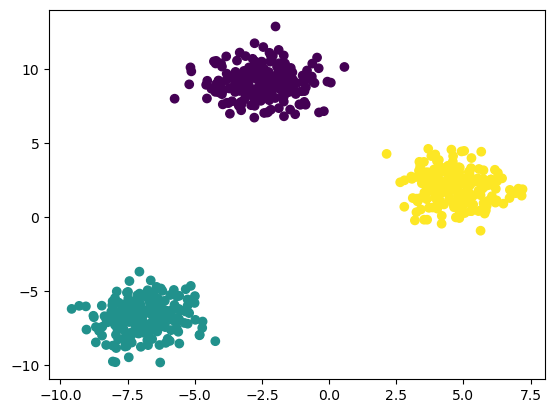

In [45]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

the above method is manual we can automate this so that i can easily find the value of k is knee locator

In [55]:
!pip install kneed


In [57]:
from kneed import KneeLocator

In [59]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [61]:
kl.elbow

3